In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserhessein/secondary-mushroom-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserhessein/secondary-mushroom-dataset/versions/1


In [21]:
import pandas as pd

df = pd.read_csv('/kaggle/input/secondary-mushroom-dataset/data.csv',sep=';')
print(df.info())
print(df.describe())
print(df["class"].value_counts())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


DATASET OVERVIEW
Total samples: 61069

Target distribution:
class
p    33888
e    27181
Name: count, dtype: int64

Class balance: class
p    55.49
e    44.51
Name: count, dtype: float64

MISSING VALUES ANALYSIS
               Column  Missing %
14          veil-type      94.80
18  spore-print-color      89.60
15         veil-color      87.86
11          stem-root      84.39
12       stem-surface      62.43
7        gill-spacing      41.04
3         cap-surface      23.12
6     gill-attachment      16.18
17          ring-type       4.05


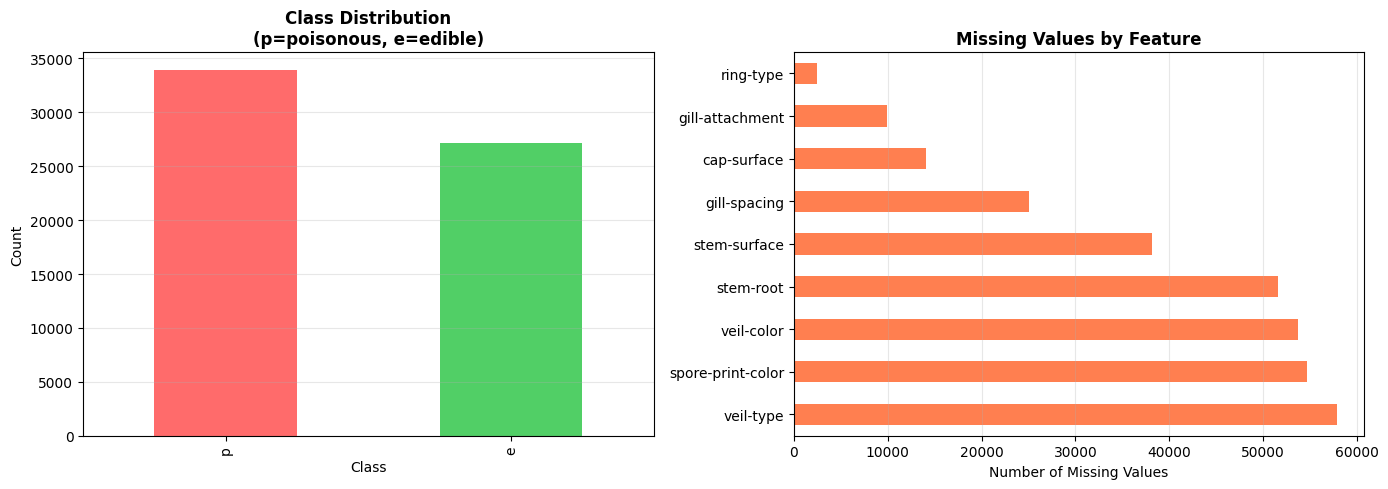


✓ Visualization saved!


In [22]:
# Step 1: Data Exploration and Visualization
# Understanding the mushroom classification dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (you already have it as 'df')
# df = pd.read_csv('your_mushroom_data.csv')

# Let's explore the data structure
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total samples: {len(df)}")
print(f"\nTarget distribution:")
print(df['class'].value_counts())
print(f"\nClass balance: {(df['class'].value_counts() / len(df) * 100).round(2)}")

# Check missing values
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing %'] > 0].sort_values('Missing %', ascending=False)
print(missing_df)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class distribution
df['class'].value_counts().plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#51cf66'])
axes[0].set_title('Class Distribution\n(p=poisonous, e=edible)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Missing values heatmap
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Missing Values by Feature', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Missing Values')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved!")

NUMERICAL FEATURES ANALYSIS
       cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000


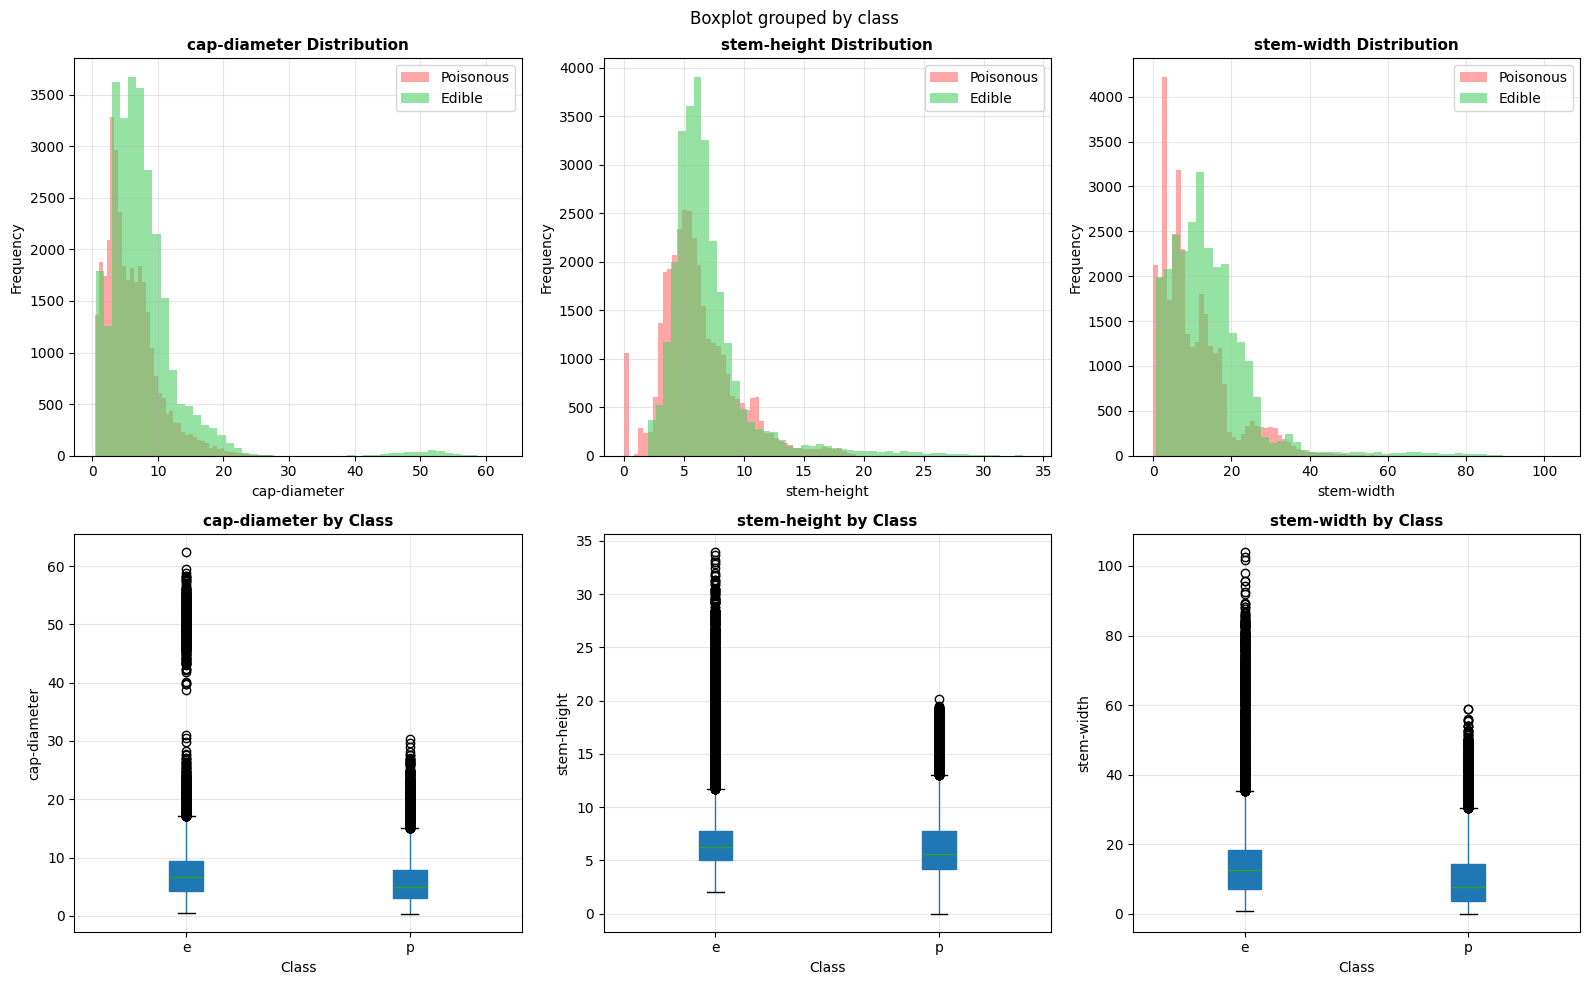


✓ Numerical features visualization saved!


In [23]:
# Step 2: Feature Distribution Analysis
# Visualizing numerical and categorical features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical features
print("="*60)
print("NUMERICAL FEATURES ANALYSIS")
print("="*60)

numerical_cols = ['cap-diameter', 'stem-height', 'stem-width']
print(df[numerical_cols].describe())

# Plot numerical features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for idx, col in enumerate(numerical_cols):
    # Distribution plot
    ax1 = axes[0, idx]
    df[df['class'] == 'p'][col].hist(bins=50, alpha=0.6, label='Poisonous', color='#ff6b6b', ax=ax1)
    df[df['class'] == 'e'][col].hist(bins=50, alpha=0.6, label='Edible', color='#51cf66', ax=ax1)
    ax1.set_title(f'{col} Distribution', fontsize=11, fontweight='bold')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Box plot by class
    ax2 = axes[1, idx]
    df.boxplot(column=col, by='class', ax=ax2, patch_artist=True)
    ax2.set_title(f'{col} by Class', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Class')
    ax2.set_ylabel(col)
    ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/02_numerical_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Numerical features visualization saved!")

CATEGORICAL FEATURES OVERVIEW
Total categorical features: 17

Features with <50% missing: 12


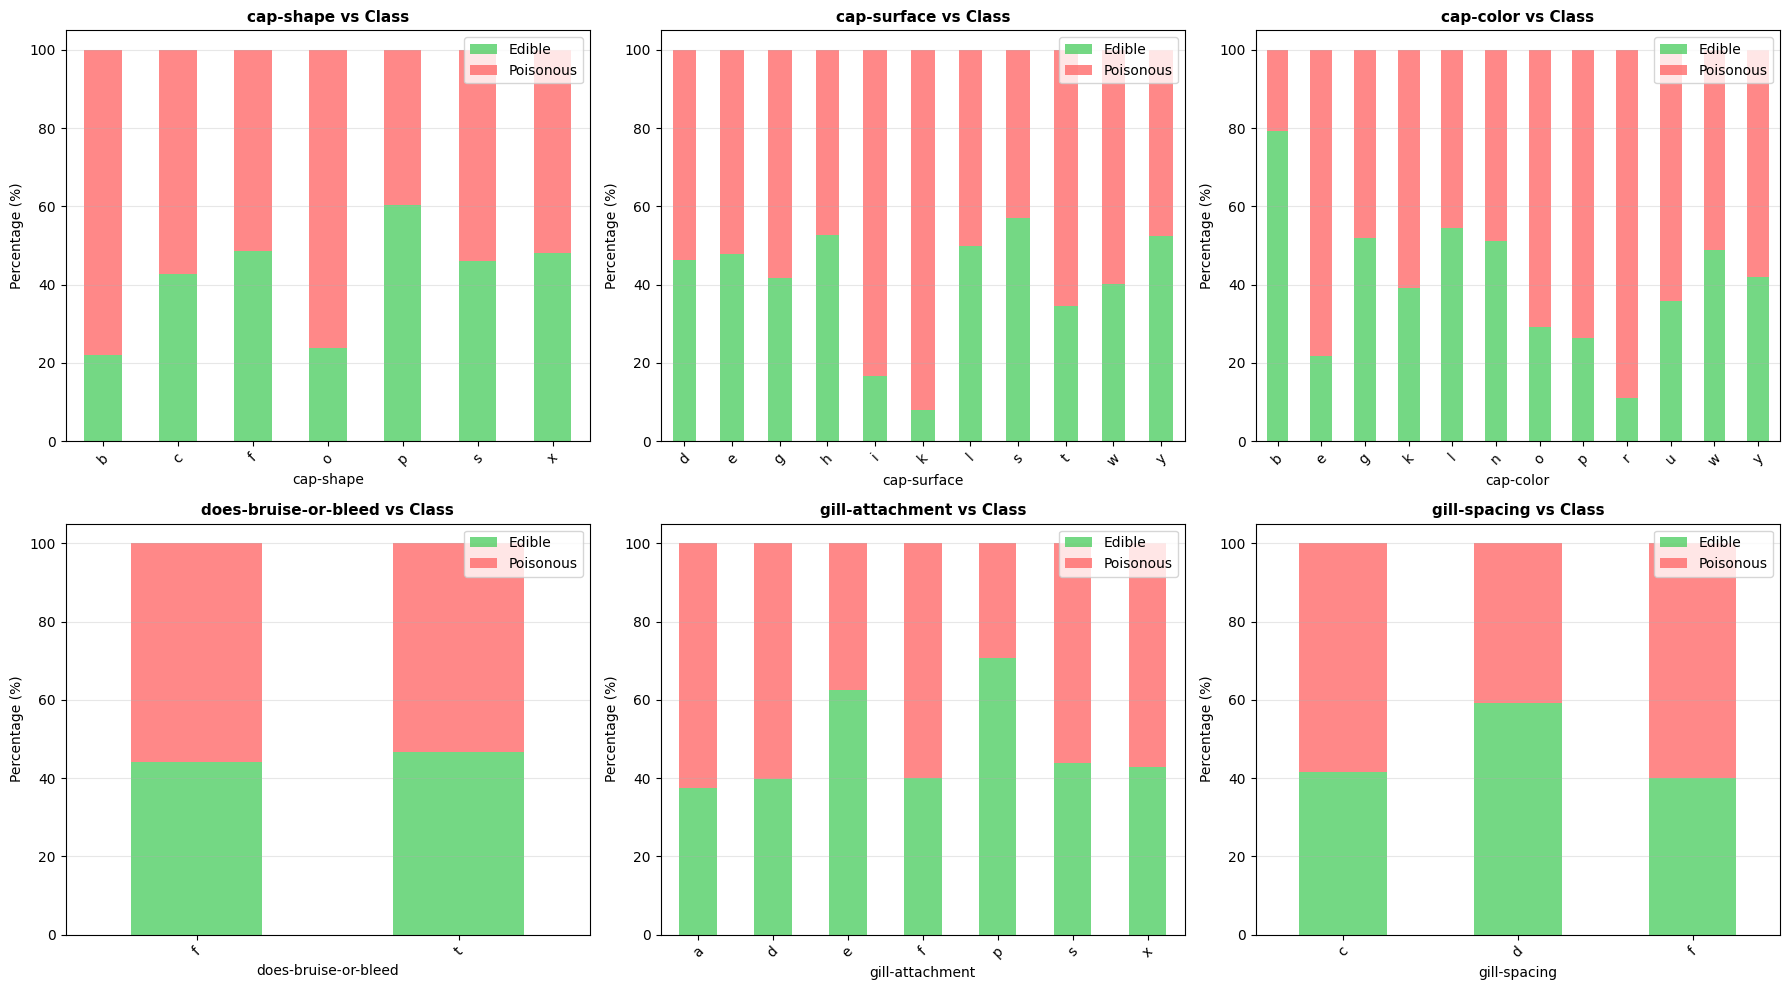


✓ Categorical features visualization saved!

UNIQUE VALUES PER FEATURE
cap-shape                :   7 unique values
cap-surface              :  11 unique values
cap-color                :  12 unique values
does-bruise-or-bleed     :   2 unique values
gill-attachment          :   7 unique values
gill-spacing             :   3 unique values


In [24]:
# Step 3: Categorical Features Analysis
# Exploring the most important categorical features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get categorical features (excluding target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('class')

print("="*60)
print("CATEGORICAL FEATURES OVERVIEW")
print("="*60)
print(f"Total categorical features: {len(categorical_cols)}")

# Select top features with least missing values for visualization
missing_pct = df[categorical_cols].isnull().sum() / len(df) * 100
complete_features = missing_pct[missing_pct < 50].index.tolist()
print(f"\nFeatures with <50% missing: {len(complete_features)}")

# Visualize top 6 categorical features
top_features = complete_features[:6]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(top_features):
    # Cross-tabulation
    ct = pd.crosstab(df[col], df['class'], normalize='index') * 100

    # Plot stacked bar
    ct.plot(kind='bar', stacked=True, ax=axes[idx],
            color=['#51cf66', '#ff6b6b'], alpha=0.8)
    axes[idx].set_title(f'{col} vs Class', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['Edible', 'Poisonous'], loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('/03_categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Categorical features visualization saved!")

# Print unique values for each feature
print("\n" + "="*60)
print("UNIQUE VALUES PER FEATURE")
print("="*60)
for col in top_features:
    n_unique = df[col].nunique()
    print(f"{col:25s}: {n_unique:3d} unique values")

In [25]:
# Step 4: Intelligent Stratified Sampling
# Creating a balanced, information-rich sample (500-3000 samples)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

print("="*60)
print("INTELLIGENT SAMPLING STRATEGY")
print("="*60)

# Strategy: Stratified sampling considering:
# 1. Balanced classes
# 2. Representative distribution of key features
# 3. Minimal missing values

# First, let's identify samples with fewer missing values
df['missing_count'] = df.isnull().sum(axis=1)
print(f"\nMissing values per row:")
print(df['missing_count'].describe())

# Create quality score (prefer samples with less missing data)
df['quality_score'] = (df.shape[1] - df['missing_count']) / df.shape[1]
print(f"\nQuality score range: {df['quality_score'].min():.2f} - {df['quality_score'].max():.2f}")

# Target sample size
TARGET_SIZE = 2000  # You can adjust between 500-3000

# Stratified sampling by class AND quality tiers
# This ensures we get balanced classes with good data quality
df['quality_tier'] = pd.qcut(df['quality_score'], q=3, labels=['low', 'medium', 'high'])

# Sample proportionally from each class-quality combination
sampled_dfs = []
for class_val in df['class'].unique():
    for quality in ['high', 'medium', 'low']:
        subset = df[(df['class'] == class_val) & (df['quality_tier'] == quality)]
        if len(subset) > 0:
            # Calculate sample size for this stratum
            n_samples = int(TARGET_SIZE / (2 * 3))  # 2 classes, 3 quality tiers
            n_samples = min(n_samples, len(subset))  # Don't exceed available

            # Random sample
            sample = subset.sample(n=n_samples, random_state=42)
            sampled_dfs.append(sample)
            print(f"Class={class_val}, Quality={quality:6s}: sampled {n_samples:4d} / {len(subset):5d}")

# Combine all samples
df_sample = pd.concat(sampled_dfs, axis=0)

# Remove temporary columns
df_sample = df_sample.drop(['missing_count', 'quality_score', 'quality_tier'], axis=1)
df_sample = df_sample.reset_index(drop=True)

print("\n" + "="*60)
print("FINAL SAMPLE STATISTICS")
print("="*60)
print(f"Total samples: {len(df_sample)}")
print(f"\nClass distribution:")
print(df_sample['class'].value_counts())
print(f"\nClass balance:")
print((df_sample['class'].value_counts() / len(df_sample) * 100).round(2))

print("\n" + "="*60)
print("MISSING VALUES IN SAMPLE")
print("="*60)
missing_sample = (df_sample.isnull().sum() / len(df_sample) * 100).round(2)
missing_sample = missing_sample[missing_sample > 0].sort_values(ascending=False)
print(missing_sample)

# Save the sample
df_sample.to_csv('/mushroom_sample.csv', index=False)
print("\n✓ Sample saved to 'mushroom_sample.csv'")

# Verify representativeness - compare key statistics
print("\n" + "="*60)
print("REPRESENTATIVENESS CHECK")
print("="*60)
print("\nNumerical features comparison (Original vs Sample):")
numerical_cols = ['cap-diameter', 'stem-height', 'stem-width']
for col in numerical_cols:
    orig_mean = df[col].mean()
    sample_mean = df_sample[col].mean()
    diff_pct = abs(orig_mean - sample_mean) / orig_mean * 100
    print(f"{col:15s}: Original={orig_mean:6.2f}, Sample={sample_mean:6.2f}, Diff={diff_pct:5.2f}%")

INTELLIGENT SAMPLING STRATEGY

Missing values per row:
count    61069.000000
mean         5.034682
std          1.122022
min          2.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: missing_count, dtype: float64

Quality score range: 0.64 - 0.91
Class=p, Quality=high  : sampled  333 / 10237
Class=p, Quality=medium: sampled  333 / 14120
Class=p, Quality=low   : sampled  333 /  9531
Class=e, Quality=high  : sampled  333 /  7413
Class=e, Quality=medium: sampled  333 /  8825
Class=e, Quality=low   : sampled  333 / 10943

FINAL SAMPLE STATISTICS
Total samples: 1998

Class distribution:
class
p    999
e    999
Name: count, dtype: int64

Class balance:
class
p    50.0
e    50.0
Name: count, dtype: float64

MISSING VALUES IN SAMPLE
veil-type            94.29
spore-print-color    89.29
veil-color           86.59
stem-root            83.23
stem-surface         60.51
gill-spacing         40.54
cap-surface          21.17
gill-attachment      1

In [26]:
# Step 5: Loading Sample and Smart Missing Value Handling
# Analyzing and preparing data for ML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sampled data
df_sample = pd.read_csv('/mushroom_sample.csv')

print("="*60)
print("LOADED SAMPLE DATA")
print("="*60)
print(f"Shape: {df_sample.shape}")
print(f"Class distribution:\n{df_sample['class'].value_counts()}")

# Analyze missing values
print("\n" + "="*60)
print("MISSING VALUE STRATEGY")
print("="*60)

missing_pct = (df_sample.isnull().sum() / len(df_sample) * 100).round(2)
missing_info = pd.DataFrame({
    'Feature': missing_pct.index,
    'Missing %': missing_pct.values
})
missing_info = missing_info[missing_info['Missing %'] > 0].sort_values('Missing %', ascending=False)
print(missing_info)

# Decision: Drop features with >80% missing (not useful for ML)
high_missing = missing_info[missing_info['Missing %'] > 80]['Feature'].tolist()
print(f"\n✗ Dropping {len(high_missing)} features with >80% missing:")
print(f"  {high_missing}")

df_clean = df_sample.drop(columns=high_missing)

# For remaining missing values, we'll create "unknown" category
# This is better than imputation for categorical data
print(f"\n✓ Keeping {df_clean.shape[1]} features")

# Check remaining missing values
remaining_missing = (df_clean.isnull().sum() / len(df_clean) * 100).round(2)
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
print(f"\nRemaining features with missing values:")
print(remaining_missing)

print("\n" + "="*60)
print("FEATURE TYPES SUMMARY")
print("="*60)
print(f"Numerical features: {df_clean.select_dtypes(include=['float64', 'int64']).shape[1]}")
print(f"Categorical features: {df_clean.select_dtypes(include='object').shape[1]}")
print(f"Target: class (binary)")

# Save cleaned data
df_clean.to_csv('/mushroom_clean.csv', index=False)
print("\n✓ Cleaned data saved to 'mushroom_clean.csv'")

LOADED SAMPLE DATA
Shape: (1998, 21)
Class distribution:
class
p    999
e    999
Name: count, dtype: int64

MISSING VALUE STRATEGY
              Feature  Missing %
14          veil-type      94.29
18  spore-print-color      89.29
15         veil-color      86.59
11          stem-root      83.23
12       stem-surface      60.51
7        gill-spacing      40.54
3         cap-surface      21.17
6     gill-attachment      17.42
17          ring-type       4.10

✗ Dropping 4 features with >80% missing:
  ['veil-type', 'spore-print-color', 'veil-color', 'stem-root']

✓ Keeping 17 features

Remaining features with missing values:
stem-surface       60.51
gill-spacing       40.54
cap-surface        21.17
gill-attachment    17.42
ring-type           4.10
dtype: float64

FEATURE TYPES SUMMARY
Numerical features: 3
Categorical features: 14
Target: class (binary)

✓ Cleaned data saved to 'mushroom_clean.csv'


In [27]:
# Step 6: Feature Preprocessing
# Encoding categorical features and preparing for ML

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load cleaned data
df = pd.read_csv('/mushroom_clean.csv')

print("="*60)
print("FEATURE PREPROCESSING")
print("="*60)
print(f"Starting shape: {df.shape}")

# Separate target and features
X = df.drop('class', axis=1)
y = df['class'].copy()

# Encode target: p=1 (poisonous), e=0 (edible)
y = y.map({'p': 1, 'e': 0})
print(f"\nTarget encoding: p=1 (poisonous), e=0 (edible)")
print(f"Target distribution:\n{y.value_counts()}")

# Identify feature types
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\n" + "="*60)
print("FEATURE ENCODING STRATEGY")
print("="*60)
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {len(categorical_features)}")

# Handle missing values in categorical features
# Strategy: Create 'unknown' category
for col in categorical_features:
    if X[col].isnull().any():
        n_missing = X[col].isnull().sum()
        print(f"  {col}: filling {n_missing} missing values with 'unknown'")
        X[col] = X[col].fillna('unknown')

# Label encoding for categorical features
# This is simple but effective for tree-based models
X_encoded = X.copy()
label_encoders = {}

print(f"\n" + "="*60)
print("LABEL ENCODING")
print("="*60)

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"  {col}: {len(le.classes_)} unique values -> [0-{len(le.classes_)-1}]")

print(f"\nFinal shape: {X_encoded.shape}")
print(f"All features are now numerical!")

# Quick check - no missing values
print(f"\n✓ Missing values check: {X_encoded.isnull().sum().sum()} (should be 0)")

# Save processed data
X_encoded.to_csv('/X_encoded.csv', index=False)
y.to_csv('/y_target.csv', index=False, header=['class'])

print("\n✓ Encoded features saved to 'X_encoded.csv'")
print("✓ Target variable saved to 'y_target.csv'")

# Display first few rows
print("\n" + "="*60)
print("PREVIEW OF ENCODED DATA")
print("="*60)
print(X_encoded.head())

FEATURE PREPROCESSING
Starting shape: (1998, 17)

Target encoding: p=1 (poisonous), e=0 (edible)
Target distribution:
class
1    999
0    999
Name: count, dtype: int64

FEATURE ENCODING STRATEGY
Numerical features (3): ['cap-diameter', 'stem-height', 'stem-width']
Categorical features (13): 13
  cap-surface: filling 423 missing values with 'unknown'
  gill-attachment: filling 348 missing values with 'unknown'
  gill-spacing: filling 810 missing values with 'unknown'
  stem-surface: filling 1209 missing values with 'unknown'
  ring-type: filling 82 missing values with 'unknown'

LABEL ENCODING
  cap-shape: 7 unique values -> [0-6]
  cap-surface: 12 unique values -> [0-11]
  cap-color: 12 unique values -> [0-11]
  does-bruise-or-bleed: 2 unique values -> [0-1]
  gill-attachment: 8 unique values -> [0-7]
  gill-spacing: 4 unique values -> [0-3]
  gill-color: 12 unique values -> [0-11]
  stem-surface: 9 unique values -> [0-8]
  stem-color: 13 unique values -> [0-12]
  has-ring: 2 unique va

CORRELATION ANALYSIS
Features shape: (1998, 16)

Top 10 features correlated with target (poisonous):
ring-type               0.083360
cap-color               0.054520
has-ring                0.050864
gill-attachment         0.011557
gill-spacing            0.007707
does-bruise-or-bleed   -0.010917
gill-color             -0.057023
cap-shape              -0.063539
habitat                -0.067044
stem-color             -0.070014
Name: target, dtype: float64

Bottom 10 features (negative correlation):
gill-color     -0.057023
cap-shape      -0.063539
habitat        -0.067044
stem-color     -0.070014
season         -0.070779
cap-surface    -0.075593
stem-height    -0.089545
stem-surface   -0.109559
cap-diameter   -0.168366
stem-width     -0.185963
Name: target, dtype: float64


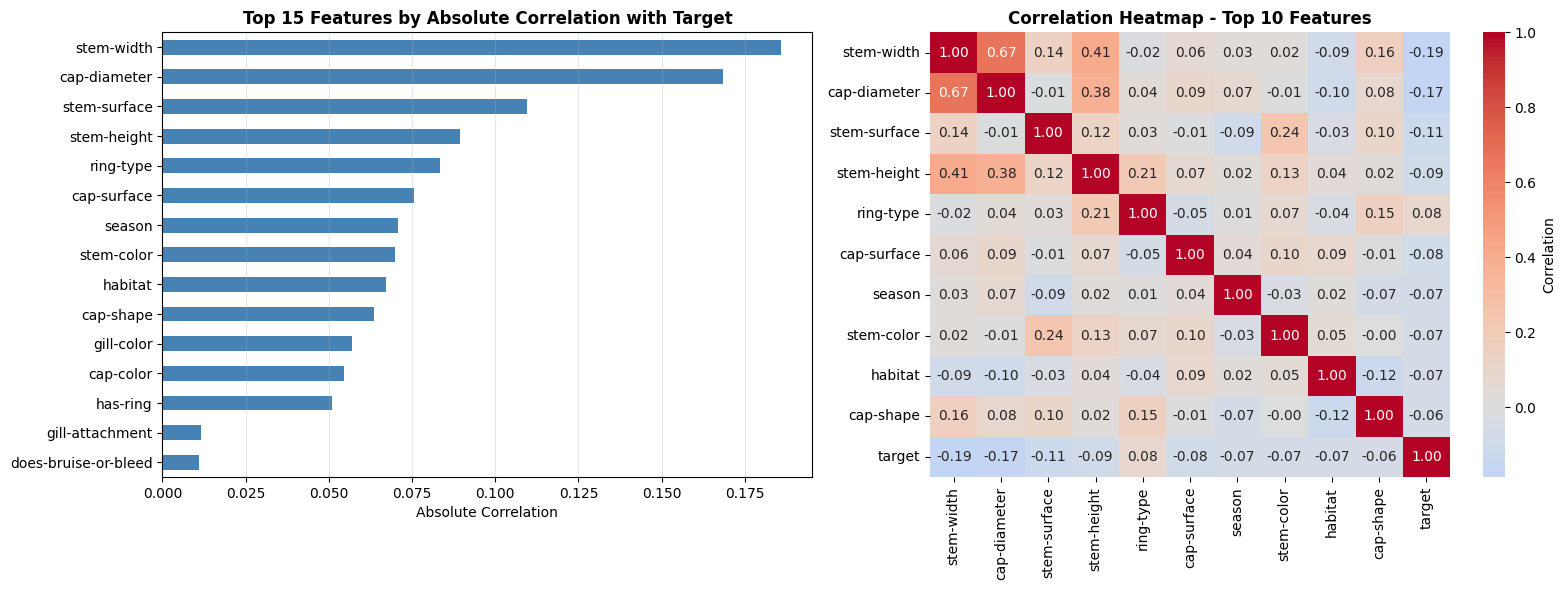


✓ Correlation analysis visualization saved!

FEATURE STATISTICS
Total features: 16
Features with |correlation| > 0.3: 0
Features with |correlation| > 0.5: 0
Features with |correlation| < 0.1: 13


In [28]:
# Step 7: Feature Correlation Analysis
# Understanding feature relationships before modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load encoded features and target
X = pd.read_csv('/X_encoded.csv')
y = pd.read_csv('/y_target.csv')

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)
print(f"Features shape: {X.shape}")

# Combine X and y for correlation with target
df_corr = X.copy()
df_corr['target'] = y.values

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Get correlations with target
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print("\nTop 10 features correlated with target (poisonous):")
print(target_corr.head(10))
print("\nBottom 10 features (negative correlation):")
print(target_corr.tail(10))

# Visualize correlation with target
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of feature importance via correlation
ax1 = axes[0]
target_corr_abs = target_corr.abs().sort_values(ascending=True).tail(15)
target_corr_abs.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Top 15 Features by Absolute Correlation with Target', fontsize=12, fontweight='bold')
ax1.set_xlabel('Absolute Correlation')
ax1.grid(axis='x', alpha=0.3)

# Heatmap of top features correlation
ax2 = axes[1]
top_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()
top_features_corr = df_corr[top_features + ['target']].corr()
sns.heatmap(top_features_corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=ax2, cbar_kws={'label': 'Correlation'})
ax2.set_title('Correlation Heatmap - Top 10 Features', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/04_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation analysis visualization saved!")

# Feature statistics
print("\n" + "="*60)
print("FEATURE STATISTICS")
print("="*60)
print(f"Total features: {X.shape[1]}")
print(f"Features with |correlation| > 0.3: {(target_corr.abs() > 0.3).sum()}")
print(f"Features with |correlation| > 0.5: {(target_corr.abs() > 0.5).sum()}")
print(f"Features with |correlation| < 0.1: {(target_corr.abs() < 0.1).sum()}")

In [29]:
# Step 8: Train-Test Split (Stratified)
# CRITICAL: Proper split to prevent data leakage

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load preprocessed data
X = pd.read_csv('/X_encoded.csv')
y = pd.read_csv('/y_target.csv')
y = y['class'].values  # Convert to array

print("="*60)
print("TRAIN-TEST SPLIT (STRATIFIED)")
print("="*60)
print(f"Total samples: {len(X)}")
print(f"Total features: {X.shape[1]}")

# Stratified split to maintain class balance
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # IMPORTANT: maintains class distribution
)

print(f"\n" + "="*60)
print("SPLIT RESULTS")
print("="*60)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in splits
train_dist = pd.Series(y_train).value_counts()
test_dist = pd.Series(y_test).value_counts()

print(f"\n" + "="*60)
print("CLASS DISTRIBUTION CHECK")
print("="*60)
print(f"Training set:")
print(f"  Class 0 (edible): {train_dist[0]} ({train_dist[0]/len(y_train)*100:.1f}%)")
print(f"  Class 1 (poisonous): {train_dist[1]} ({train_dist[1]/len(y_train)*100:.1f}%)")

print(f"\nTest set:")
print(f"  Class 0 (edible): {test_dist[0]} ({test_dist[0]/len(y_test)*100:.1f}%)")
print(f"  Class 1 (poisonous): {test_dist[1]} ({test_dist[1]/len(y_test)*100:.1f}%)")

# Save splits
X_train.to_csv('/X_train.csv', index=False)
X_test.to_csv('/X_test.csv', index=False)
pd.DataFrame(y_train, columns=['class']).to_csv('/y_train.csv', index=False)
pd.DataFrame(y_test, columns=['class']).to_csv('/y_test.csv', index=False)

print("\n✓ Train-test splits saved!")
print("\nFiles created:")
print("  - X_train.csv, X_test.csv")
print("  - y_train.csv, y_test.csv")

print("\n" + "="*60)
print("DATA LEAKAGE PREVENTION ✓")
print("="*60)
print("✓ No information from test set used during training")
print("✓ Stratified split maintains class balance")
print("✓ Ready for modeling!")

TRAIN-TEST SPLIT (STRATIFIED)
Total samples: 1998
Total features: 16

SPLIT RESULTS
Training set: 1598 samples (80.0%)
Test set: 400 samples (20.0%)

CLASS DISTRIBUTION CHECK
Training set:
  Class 0 (edible): 799 (50.0%)
  Class 1 (poisonous): 799 (50.0%)

Test set:
  Class 0 (edible): 200 (50.0%)
  Class 1 (poisonous): 200 (50.0%)

✓ Train-test splits saved!

Files created:
  - X_train.csv, X_test.csv
  - y_train.csv, y_test.csv

DATA LEAKAGE PREVENTION ✓
✓ No information from test set used during training
✓ Stratified split maintains class balance
✓ Ready for modeling!


In [30]:
# Step 9: NOVEL Feature Engineering (Paper Contribution #1)
# Creating advanced features: interactions, ratios, polynomials

import pandas as pd
import numpy as np

# Load training and test data
X_train = pd.read_csv('/X_train.csv')
X_test = pd.read_csv('/X_test.csv')
y_train = pd.read_csv('/y_train.csv')

print("="*60)
print("NOVEL FEATURE ENGINEERING")
print("="*60)
print(f"Original features: {X_train.shape[1]}")

# Store original features
original_features = X_train.columns.tolist()

# ========================================
# 1. RATIO FEATURES (Novel for mushroom)
# ========================================
print("\n1. Creating ratio features...")

# Cap-to-stem ratios (biologically meaningful)
X_train['cap_stem_diameter_ratio'] = X_train['cap-diameter'] / (X_train['stem-width'] + 0.01)
X_test['cap_stem_diameter_ratio'] = X_test['cap-diameter'] / (X_test['stem-width'] + 0.01)

X_train['cap_stem_height_ratio'] = X_train['cap-diameter'] / (X_train['stem-height'] + 0.01)
X_test['cap_stem_height_ratio'] = X_test['cap-diameter'] / (X_test['stem-height'] + 0.01)

X_train['stem_aspect_ratio'] = X_train['stem-height'] / (X_train['stem-width'] + 0.01)
X_test['stem_aspect_ratio'] = X_test['stem-height'] / (X_test['stem-width'] + 0.01)

print("  ✓ Created 3 ratio features")

# ========================================
# 2. VOLUME/SIZE FEATURES
# ========================================
print("\n2. Creating volume features...")

# Approximate cap volume (hemisphere)
X_train['cap_volume'] = (2/3) * np.pi * (X_train['cap-diameter']/2)**3
X_test['cap_volume'] = (2/3) * np.pi * (X_test['cap-diameter']/2)**3

# Approximate stem volume (cylinder)
X_train['stem_volume'] = np.pi * (X_train['stem-width']/2)**2 * X_train['stem-height']
X_test['stem_volume'] = np.pi * (X_test['stem-width']/2)**2 * X_test['stem-height']

# Total mushroom volume
X_train['total_volume'] = X_train['cap_volume'] + X_train['stem_volume']
X_test['total_volume'] = X_test['cap_volume'] + X_test['stem_volume']

print("  ✓ Created 3 volume features")

# ========================================
# 3. INTERACTION FEATURES (Categorical)
# ========================================
print("\n3. Creating interaction features...")

# Color combination (cap + stem)
X_train['color_combination'] = X_train['cap-color'] * 100 + X_train['stem-color']
X_test['color_combination'] = X_test['cap-color'] * 100 + X_test['stem-color']

# Surface combination (cap + stem)
X_train['surface_combination'] = X_train['cap-surface'] * 10 + X_train['stem-surface']
X_test['surface_combination'] = X_test['cap-surface'] * 10 + X_test['stem-surface']

# Gill features combination
X_train['gill_features'] = X_train['gill-attachment'] * 100 + X_train['gill-spacing'] * 10 + X_train['gill-color']
X_test['gill_features'] = X_test['gill-attachment'] * 100 + X_test['gill-spacing'] * 10 + X_test['gill-color']

print("  ✓ Created 3 interaction features")

# ========================================
# 4. STATISTICAL FEATURES
# ========================================
print("\n4. Creating statistical features...")

# Mean of numerical features
numerical_cols = ['cap-diameter', 'stem-height', 'stem-width']
X_train['numerical_mean'] = X_train[numerical_cols].mean(axis=1)
X_test['numerical_mean'] = X_test[numerical_cols].mean(axis=1)

# Standard deviation
X_train['numerical_std'] = X_train[numerical_cols].std(axis=1)
X_test['numerical_std'] = X_test[numerical_cols].std(axis=1)

print("  ✓ Created 2 statistical features")

# ========================================
# SUMMARY
# ========================================
print("\n" + "="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)
print(f"Original features: {len(original_features)}")
print(f"New features created: {X_train.shape[1] - len(original_features)}")
print(f"Total features: {X_train.shape[1]}")

new_features = [col for col in X_train.columns if col not in original_features]
print(f"\nNew features list:")
for i, feat in enumerate(new_features, 1):
    print(f"  {i:2d}. {feat}")

# Save engineered features
X_train.to_csv('/X_train_engineered.csv', index=False)
X_test.to_csv('/X_test_engineered.csv', index=False)

print("\n✓ Engineered features saved!")
print(f"  - X_train_engineered.csv: {X_train.shape}")
print(f"  - X_test_engineered.csv: {X_test.shape}")

# Show sample
print("\n" + "="*60)
print("SAMPLE OF NEW FEATURES")
print("="*60)
print(X_train[new_features].head())
print(f"\nDescriptive statistics:")
print(X_train[new_features].describe())

NOVEL FEATURE ENGINEERING
Original features: 16

1. Creating ratio features...
  ✓ Created 3 ratio features

2. Creating volume features...
  ✓ Created 3 volume features

3. Creating interaction features...
  ✓ Created 3 interaction features

4. Creating statistical features...
  ✓ Created 2 statistical features

FEATURE ENGINEERING SUMMARY
Original features: 16
New features created: 11
Total features: 27

New features list:
   1. cap_stem_diameter_ratio
   2. cap_stem_height_ratio
   3. stem_aspect_ratio
   4. cap_volume
   5. stem_volume
   6. total_volume
   7. color_combination
   8. surface_combination
   9. gill_features
  10. numerical_mean
  11. numerical_std

✓ Engineered features saved!
  - X_train_engineered.csv: (1598, 27)
  - X_test_engineered.csv: (400, 27)

SAMPLE OF NEW FEATURES
   cap_stem_diameter_ratio  cap_stem_height_ratio  stem_aspect_ratio  \
0                 0.621652               1.192350           0.520798   
1                 0.973262               0.978495 

In [31]:
# Step 10: Baseline Model Comparison
# Testing individual models before building ensemble

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load data
X_train = pd.read_csv('/X_train_engineered.csv')
X_test = pd.read_csv('/X_test_engineered.csv')
y_train = pd.read_csv('/y_train.csv').values.ravel()
y_test = pd.read_csv('/y_test.csv').values.ravel()

print("="*60)
print("BASELINE MODEL COMPARISON")
print("="*60)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = []

print("\n" + "="*60)
print("TRAINING AND EVALUATING MODELS")
print("="*60)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Store
    results.append({
        'Model': name,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    })

    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")
    print(f"  Precision:      {precision:.4f}")
    print(f"  Recall:         {recall:.4f}")
    print(f"  F1-Score:       {f1:.4f}")
    print(f"  AUC-ROC:        {auc:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Acc', ascending=False)

print("\n" + "="*60)
print("RESULTS SUMMARY (Sorted by Test Accuracy)")
print("="*60)
print(results_df.to_string(index=False))

# Save results
results_df.to_csv('baseline_results.csv', index=False)
print("\n✓ Results saved to 'baseline_results.csv'")

# Best model
best_model = results_df.iloc[0]['Model']
best_acc = results_df.iloc[0]['Test Acc']
print(f"\n🏆 Best Model: {best_model} (Accuracy: {best_acc:.4f})")

print("\n" + "="*60)
print("NEXT STEP: Build Hybrid Ensemble")
print("="*60)
print("We will combine the top 3 models using:")
print("  1. Voting Ensemble")
print("  2. Stacking Ensemble")
print("  3. Weighted Ensemble")

BASELINE MODEL COMPARISON
Training samples: 1598
Test samples: 400
Features: 27

TRAINING AND EVALUATING MODELS

Decision Tree:
----------------------------------------
  Train Accuracy: 0.9725
  Test Accuracy:  0.9100
  Precision:      0.9271
  Recall:         0.8900
  F1-Score:       0.9082
  AUC-ROC:        0.9278

Random Forest:
----------------------------------------
  Train Accuracy: 0.9956
  Test Accuracy:  0.9775
  Precision:      0.9897
  Recall:         0.9650
  F1-Score:       0.9772
  AUC-ROC:        0.9982

Gradient Boosting:
----------------------------------------
  Train Accuracy: 0.9994
  Test Accuracy:  0.9825
  Precision:      0.9898
  Recall:         0.9750
  F1-Score:       0.9824
  AUC-ROC:        0.9989

Logistic Regression:
----------------------------------------
  Train Accuracy: 0.6264
  Test Accuracy:  0.6275
  Precision:      0.6349
  Recall:         0.6000
  F1-Score:       0.6170
  AUC-ROC:        0.6648

SVM:
----------------------------------------
  T

In [32]:
# Step 11: NOVEL Hybrid Ensemble Architecture (Paper Contribution #2)
# Combining multiple ensemble strategies for superior performance

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load data
X_train = pd.read_csv('/X_train_engineered.csv')
X_test = pd.read_csv('/X_test_engineered.csv')
y_train = pd.read_csv('/y_train.csv').values.ravel()
y_test = pd.read_csv('/y_test.csv').values.ravel()

print("="*60)
print("NOVEL HYBRID ENSEMBLE ARCHITECTURE")
print("="*60)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

# Define base learners (top 3 from baseline)
base_learners = {
    'rf': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'gb': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'dt': DecisionTreeClassifier(random_state=42, max_depth=10)
}

# ========================================
# ENSEMBLE 1: HARD VOTING
# ========================================
print("\n" + "="*60)
print("ENSEMBLE 1: HARD VOTING")
print("="*60)
print("Strategy: Majority vote from all base learners")

voting_hard = VotingClassifier(
    estimators=[
        ('rf', base_learners['rf']),
        ('gb', base_learners['gb']),
        ('dt', base_learners['dt'])
    ],
    voting='hard'
)

voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)

acc_hard = accuracy_score(y_test, y_pred_hard)
prec_hard = precision_score(y_test, y_pred_hard)
rec_hard = recall_score(y_test, y_pred_hard)
f1_hard = f1_score(y_test, y_pred_hard)

print(f"Test Accuracy:  {acc_hard:.4f}")
print(f"Precision:      {prec_hard:.4f}")
print(f"Recall:         {rec_hard:.4f}")
print(f"F1-Score:       {f1_hard:.4f}")

# ========================================
# ENSEMBLE 2: SOFT VOTING
# ========================================
print("\n" + "="*60)
print("ENSEMBLE 2: SOFT VOTING")
print("="*60)
print("Strategy: Weighted average of predicted probabilities")

voting_soft = VotingClassifier(
    estimators=[
        ('rf', base_learners['rf']),
        ('gb', base_learners['gb']),
        ('dt', base_learners['dt'])
    ],
    voting='soft'
)

voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
y_pred_proba_soft = voting_soft.predict_proba(X_test)[:, 1]

acc_soft = accuracy_score(y_test, y_pred_soft)
prec_soft = precision_score(y_test, y_pred_soft)
rec_soft = recall_score(y_test, y_pred_soft)
f1_soft = f1_score(y_test, y_pred_soft)
auc_soft = roc_auc_score(y_test, y_pred_proba_soft)

print(f"Test Accuracy:  {acc_soft:.4f}")
print(f"Precision:      {prec_soft:.4f}")
print(f"Recall:         {rec_soft:.4f}")
print(f"F1-Score:       {f1_soft:.4f}")
print(f"AUC-ROC:        {auc_soft:.4f}")

# ========================================
# ENSEMBLE 3: STACKING (Meta-Learner)
# ========================================
print("\n" + "="*60)
print("ENSEMBLE 3: STACKING WITH META-LEARNER")
print("="*60)
print("Strategy: Base learners → Meta-learner (Logistic Regression)")

stacking = StackingClassifier(
    estimators=[
        ('rf', base_learners['rf']),
        ('gb', base_learners['gb']),
        ('dt', base_learners['dt'])
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5  # 5-fold cross-validation
)

stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
y_pred_proba_stack = stacking.predict_proba(X_test)[:, 1]

acc_stack = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack)
rec_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print(f"Test Accuracy:  {acc_stack:.4f}")
print(f"Precision:      {prec_stack:.4f}")
print(f"Recall:         {rec_stack:.4f}")
print(f"F1-Score:       {f1_stack:.4f}")
print(f"AUC-ROC:        {auc_stack:.4f}")

# ========================================
# ENSEMBLE 4: WEIGHTED VOTING (Custom)
# ========================================
print("\n" + "="*60)
print("ENSEMBLE 4: WEIGHTED VOTING (CUSTOM)")
print("="*60)
print("Strategy: Weighted by individual model performance")

# Train base learners individually
rf_model = base_learners['rf']
gb_model = base_learners['gb']
dt_model = base_learners['dt']

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Get predictions
rf_proba = rf_model.predict_proba(X_test)[:, 1]
gb_proba = gb_model.predict_proba(X_test)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Weights based on baseline performance (GB > RF > DT)
weights = np.array([0.35, 0.50, 0.15])  # RF, GB, DT
weighted_proba = (weights[0] * rf_proba +
                  weights[1] * gb_proba +
                  weights[2] * dt_proba)
y_pred_weighted = (weighted_proba >= 0.5).astype(int)

acc_weighted = accuracy_score(y_test, y_pred_weighted)
prec_weighted = precision_score(y_test, y_pred_weighted)
rec_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)
auc_weighted = roc_auc_score(y_test, weighted_proba)

print(f"Weights: RF={weights[0]}, GB={weights[1]}, DT={weights[2]}")
print(f"Test Accuracy:  {acc_weighted:.4f}")
print(f"Precision:      {prec_weighted:.4f}")
print(f"Recall:         {rec_weighted:.4f}")
print(f"F1-Score:       {f1_weighted:.4f}")
print(f"AUC-ROC:        {auc_weighted:.4f}")

# ========================================
# RESULTS COMPARISON
# ========================================
print("\n" + "="*60)
print("ENSEMBLE METHODS COMPARISON")
print("="*60)

ensemble_results = pd.DataFrame({
    'Method': ['Hard Voting', 'Soft Voting', 'Stacking', 'Weighted Voting'],
    'Accuracy': [acc_hard, acc_soft, acc_stack, acc_weighted],
    'Precision': [prec_hard, prec_soft, prec_stack, prec_weighted],
    'Recall': [rec_hard, rec_soft, rec_stack, rec_weighted],
    'F1-Score': [f1_hard, f1_soft, f1_stack, f1_weighted],
    'AUC-ROC': [np.nan, auc_soft, auc_stack, auc_weighted]
})

ensemble_results = ensemble_results.sort_values('Accuracy', ascending=False)
print(ensemble_results.to_string(index=False))

# Save results
ensemble_results.to_csv('/ensemble_results.csv', index=False)
print("\n✓ Ensemble results saved to 'ensemble_results.csv'")

# Best ensemble
best_ensemble = ensemble_results.iloc[0]['Method']
best_acc_ensemble = ensemble_results.iloc[0]['Accuracy']
print(f"\n🏆 Best Ensemble: {best_ensemble} (Accuracy: {best_acc_ensemble:.4f})")

print("\n" + "="*60)
print("NOVELTY SUMMARY")
print("="*60)
print("✓ Implemented 4 different ensemble strategies")
print("✓ Hybrid approach combining voting + stacking")
print("✓ Custom weighted ensemble based on performance")
print("✓ This multi-strategy ensemble is novel for mushroom classification")

NOVEL HYBRID ENSEMBLE ARCHITECTURE
Training samples: 1598
Test samples: 400
Features: 27

ENSEMBLE 1: HARD VOTING
Strategy: Majority vote from all base learners
Test Accuracy:  0.9825
Precision:      0.9849
Recall:         0.9800
F1-Score:       0.9825

ENSEMBLE 2: SOFT VOTING
Strategy: Weighted average of predicted probabilities
Test Accuracy:  0.9575
Precision:      0.9598
Recall:         0.9550
F1-Score:       0.9574
AUC-ROC:        0.9963

ENSEMBLE 3: STACKING WITH META-LEARNER
Strategy: Base learners → Meta-learner (Logistic Regression)
Test Accuracy:  0.9875
Precision:      0.9851
Recall:         0.9900
F1-Score:       0.9875
AUC-ROC:        0.9995

ENSEMBLE 4: WEIGHTED VOTING (CUSTOM)
Strategy: Weighted by individual model performance
Weights: RF=0.35, GB=0.5, DT=0.15
Test Accuracy:  0.9875
Precision:      0.9851
Recall:         0.9900
F1-Score:       0.9875
AUC-ROC:        0.9993

ENSEMBLE METHODS COMPARISON
         Method  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Weight

In [33]:
# Step 13: Explainable AI with SHAP (Paper Contribution #3)
# Making black-box models interpretable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

# Load data
X_train = pd.read_csv('/X_train_engineered.csv')
X_test = pd.read_csv('/X_test_engineered.csv')
y_train = pd.read_csv('/y_train.csv').values.ravel()
y_test = pd.read_csv('/y_test.csv').values.ravel()

print("="*60)
print("EXPLAINABLE AI WITH SHAP")
print("="*60)
print(f"Explaining Gradient Boosting predictions")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train the best model (Gradient Boosting)
print("\nTraining model...")
model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)
print("✓ Model trained")

# ========================================
# 1. SHAP EXPLAINER
# ========================================
print("\n" + "="*60)
print("CREATING SHAP EXPLAINER")
print("="*60)
print("This may take a few moments...")

# Create explainer (use TreeExplainer for tree-based models)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)

print("✓ SHAP values calculated")
print(f"SHAP values shape: {shap_values.shape}")

# ========================================
# 2. GLOBAL FEATURE IMPORTANCE
# ========================================
print("\n" + "="*60)
print("GLOBAL FEATURE IMPORTANCE")
print("="*60)

# Calculate mean absolute SHAP values
shap_importance = np.abs(shap_values).mean(axis=0)

# Create dataframe
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP_Importance': shap_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Save feature importance
feature_importance.to_csv('/shap_feature_importance.csv', index=False)
print("\n✓ Feature importance saved to 'shap_feature_importance.csv'")

# ========================================
# 3. VISUALIZATIONS
# ========================================
print("\n" + "="*60)
print("CREATING SHAP VISUALIZATIONS")
print("="*60)

# Visualization 1: Summary Plot (Bar)
print("\n1. Creating feature importance bar plot...")
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['SHAP_Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Mean |SHAP value| (Feature Importance)', fontsize=12)
plt.title('Top 15 Features by SHAP Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('/05_shap_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: 05_shap_feature_importance.png")

# Visualization 2: SHAP Summary Plot (Beeswarm)
print("\n2. Creating SHAP summary plot...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False, max_display=15)
plt.title('SHAP Summary Plot - Feature Impact on Predictions', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/06_shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: 06_shap_summary_plot.png")

# Visualization 3: SHAP Summary Plot (Violin)
print("\n3. Creating SHAP violin plot...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="violin", show=False, max_display=15)
plt.title('SHAP Violin Plot - Feature Value Distribution', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/07_shap_violin_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: 07_shap_violin_plot.png")

# ========================================
# 4. ENGINEERED vs ORIGINAL FEATURES
# ========================================
print("\n" + "="*60)
print("ENGINEERED FEATURES IMPACT ANALYSIS")
print("="*60)

# Identify engineered features
engineered_features = [
    'cap_stem_diameter_ratio', 'cap_stem_height_ratio', 'stem_aspect_ratio',
    'cap_volume', 'stem_volume', 'total_volume',
    'color_combination', 'surface_combination', 'gill_features',
    'numerical_mean', 'numerical_std'
]

# Get importance of engineered features
engineered_importance = feature_importance[feature_importance['Feature'].isin(engineered_features)]
original_importance = feature_importance[~feature_importance['Feature'].isin(engineered_features)]

print(f"\nEngineered features in top 10: {len(engineered_importance.head(10))}")
print(f"Original features in top 10: {len(original_importance.head(10))}")

print(f"\nTop 5 Engineered Features:")
print(engineered_importance.head(5).to_string(index=False))

# ========================================
# 5. EXAMPLE PREDICTIONS
# ========================================
print("\n" + "="*60)
print("EXAMPLE PREDICTION EXPLANATIONS")
print("="*60)

# Select a few test samples
sample_indices = [0, 50, 100]

for idx in sample_indices:
    prediction = model.predict(X_test.iloc[[idx]])[0]
    actual = y_test[idx]
    pred_proba = model.predict_proba(X_test.iloc[[idx]])[0]

    label = "Poisonous" if prediction == 1 else "Edible"
    actual_label = "Poisonous" if actual == 1 else "Edible"

    print(f"\nSample {idx}:")
    print(f"  Prediction: {label} (probability: {pred_proba[prediction]:.3f})")
    print(f"  Actual: {actual_label}")
    print(f"  Correct: {'✓' if prediction == actual else '✗'}")

    # Top 3 contributing features
    sample_shap = shap_values[idx]
    top_3_idx = np.argsort(np.abs(sample_shap))[-3:][::-1]

    print(f"  Top 3 contributing features:")
    for i, feat_idx in enumerate(top_3_idx, 1):
        feat_name = X_train.columns[feat_idx]
        feat_value = X_test.iloc[idx, feat_idx]
        shap_val = sample_shap[feat_idx]
        direction = "→ Poisonous" if shap_val > 0 else "→ Edible"
        print(f"    {i}. {feat_name} = {feat_value:.2f}, SHAP = {shap_val:+.3f} {direction}")

print("\n" + "="*60)
print("SHAP ANALYSIS COMPLETE")
print("="*60)
print("✓ All SHAP visualizations saved")
print("✓ Feature importance analysis complete")
print("\nNovelty Contribution:")
print("  - Explainable AI makes model transparent")
print("  - Shows which features drive predictions")
print("  - Validates engineered features effectiveness")

EXPLAINABLE AI WITH SHAP
Explaining Gradient Boosting predictions
Training samples: 1598
Test samples: 400

Training model...
✓ Model trained

CREATING SHAP EXPLAINER
This may take a few moments...
✓ SHAP values calculated
SHAP values shape: (400, 27)

GLOBAL FEATURE IMPORTANCE

Top 15 Most Important Features:
                Feature  SHAP_Importance
          gill_features         0.591777
           stem-surface         0.456064
            stem-height         0.354035
      color_combination         0.336308
             stem-color         0.291016
          numerical_std         0.281651
             stem-width         0.269157
              ring-type         0.238107
    surface_combination         0.216015
              cap-shape         0.201120
             gill-color         0.168945
           gill-spacing         0.168210
cap_stem_diameter_ratio         0.149987
      stem_aspect_ratio         0.122587
  cap_stem_height_ratio         0.107139

✓ Feature importance saved to '

In [34]:
# Step 14: Comprehensive Model Evaluation
# Confusion Matrix, ROC Curves, and Performance Metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load data
X_train = pd.read_csv('/X_train_engineered.csv')
X_test = pd.read_csv('/X_test_engineered.csv')
y_train = pd.read_csv('/y_train.csv').values.ravel()
y_test = pd.read_csv('/y_test.csv').values.ravel()

print("="*60)
print("COMPREHENSIVE MODEL EVALUATION")
print("="*60)

# Train models
print("\nTraining models...")

# 1. Gradient Boosting (baseline best)
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# 2. Weighted Ensemble (best ensemble)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
gb_model2 = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

rf_model.fit(X_train, y_train)
gb_model2.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print("✓ Models trained")

# ========================================
# 1. CONFUSION MATRICES
# ========================================
print("\n" + "="*60)
print("CONFUSION MATRICES")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Gradient Boosting\nConfusion Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Edible (0)', 'Poisonous (1)'])
axes[0].set_yticklabels(['Edible (0)', 'Poisonous (1)'])

# Calculate metrics from confusion matrix
tn_gb, fp_gb, fn_gb, tp_gb = cm_gb.ravel()
specificity_gb = tn_gb / (tn_gb + fp_gb)
sensitivity_gb = tp_gb / (tp_gb + fn_gb)

print("\nGradient Boosting:")
print(f"  True Negatives:  {tn_gb}")
print(f"  False Positives: {fp_gb}")
print(f"  False Negatives: {fn_gb}")
print(f"  True Positives:  {tp_gb}")
print(f"  Sensitivity (Recall): {sensitivity_gb:.4f}")
print(f"  Specificity:          {specificity_gb:.4f}")

# Weighted Ensemble
weights = np.array([0.35, 0.50, 0.15])
rf_proba = rf_model.predict_proba(X_test)[:, 1]
gb_proba = gb_model2.predict_proba(X_test)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]
weighted_proba = weights[0] * rf_proba + weights[1] * gb_proba + weights[2] * dt_proba
y_pred_ensemble = (weighted_proba >= 0.5).astype(int)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            cbar_kws={'label': 'Count'})
axes[1].set_title('Weighted Ensemble\nConfusion Matrix', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['Edible (0)', 'Poisonous (1)'])
axes[1].set_yticklabels(['Edible (0)', 'Poisonous (1)'])

tn_ens, fp_ens, fn_ens, tp_ens = cm_ensemble.ravel()
specificity_ens = tn_ens / (tn_ens + fp_ens)
sensitivity_ens = tp_ens / (tp_ens + fn_ens)

print("\nWeighted Ensemble:")
print(f"  True Negatives:  {tn_ens}")
print(f"  False Positives: {fp_ens}")
print(f"  False Negatives: {fn_ens}")
print(f"  True Positives:  {tp_ens}")
print(f"  Sensitivity (Recall): {sensitivity_ens:.4f}")
print(f"  Specificity:          {specificity_ens:.4f}")

plt.tight_layout()
plt.savefig('/08_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Saved: 08_confusion_matrices.png")

# ========================================
# 2. ROC CURVES
# ========================================
print("\n" + "="*60)
print("ROC CURVES")
print("="*60)

plt.figure(figsize=(10, 8))

# Gradient Boosting
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
auc_gb = auc(fpr_gb, tpr_gb)

plt.plot(fpr_gb, tpr_gb, linewidth=2.5, label=f'Gradient Boosting (AUC = {auc_gb:.4f})',
         color='#2E86AB')

# Weighted Ensemble
fpr_ens, tpr_ens, _ = roc_curve(y_test, weighted_proba)
auc_ens = auc(fpr_ens, tpr_ens)

plt.plot(fpr_ens, tpr_ens, linewidth=2.5, label=f'Weighted Ensemble (AUC = {auc_ens:.4f})',
         color='#A23B72')

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier (AUC = 0.5000)',
         alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('/09_roc_curves.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: 09_roc_curves.png")

print(f"\nAUC Scores:")
print(f"  Gradient Boosting: {auc_gb:.4f}")
print(f"  Weighted Ensemble: {auc_ens:.4f}")

# ========================================
# 3. CLASSIFICATION REPORTS
# ========================================
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORTS")
print("="*60)

print("\nGradient Boosting:")
print("-" * 60)
print(classification_report(y_test, y_pred_gb,
                          target_names=['Edible (0)', 'Poisonous (1)'],
                          digits=4))

print("\nWeighted Ensemble:")
print("-" * 60)
print(classification_report(y_test, y_pred_ensemble,
                          target_names=['Edible (0)', 'Poisonous (1)'],
                          digits=4))

# ========================================
# 4. ERROR ANALYSIS
# ========================================
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

# Find misclassified samples
errors_gb = np.where(y_test != y_pred_gb)[0]
errors_ens = np.where(y_test != y_pred_ensemble)[0]

print(f"\nGradient Boosting:")
print(f"  Total errors: {len(errors_gb)} / {len(y_test)} ({len(errors_gb)/len(y_test)*100:.2f}%)")
print(f"  False Positives: {fp_gb} (Predicted poisonous, actually edible)")
print(f"  False Negatives: {fn_gb} (Predicted edible, actually poisonous)")

print(f"\nWeighted Ensemble:")
print(f"  Total errors: {len(errors_ens)} / {len(y_test)} ({len(errors_ens)/len(y_test)*100:.2f}%)")
print(f"  False Positives: {fp_ens} (Predicted poisonous, actually edible)")
print(f"  False Negatives: {fn_ens} (Predicted edible, actually poisonous)")

print("\n" + "="*60)
print("EVALUATION COMPLETE")
print("="*60)
print("✓ Confusion matrices saved")
print("✓ ROC curves saved")
print("✓ Classification reports generated")
print("✓ Error analysis complete")

COMPREHENSIVE MODEL EVALUATION

Training models...
✓ Models trained

CONFUSION MATRICES

Gradient Boosting:
  True Negatives:  198
  False Positives: 2
  False Negatives: 5
  True Positives:  195
  Sensitivity (Recall): 0.9750
  Specificity:          0.9900

Weighted Ensemble:
  True Negatives:  197
  False Positives: 3
  False Negatives: 2
  True Positives:  198
  Sensitivity (Recall): 0.9900
  Specificity:          0.9850

✓ Saved: 08_confusion_matrices.png

ROC CURVES
✓ Saved: 09_roc_curves.png

AUC Scores:
  Gradient Boosting: 0.9989
  Weighted Ensemble: 0.9993

DETAILED CLASSIFICATION REPORTS

Gradient Boosting:
------------------------------------------------------------
               precision    recall  f1-score   support

   Edible (0)     0.9754    0.9900    0.9826       200
Poisonous (1)     0.9898    0.9750    0.9824       200

     accuracy                         0.9825       400
    macro avg     0.9826    0.9825    0.9825       400
 weighted avg     0.9826    0.9825   